# Loading necessary deoendancies

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.shape

(8523, 12)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot: >

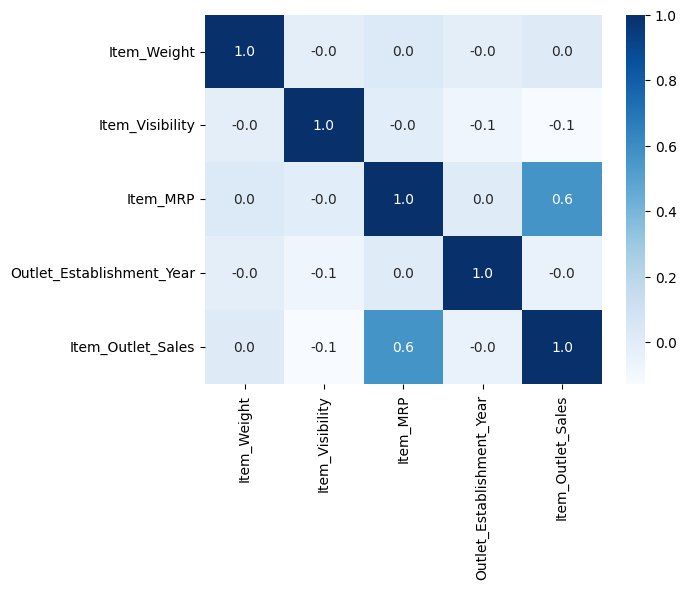

In [7]:
sb.heatmap(df.corr(),annot=True,fmt='.1f',cmap='Blues')

In [8]:
# categorical data
df.select_dtypes(object).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Item_Weight'>

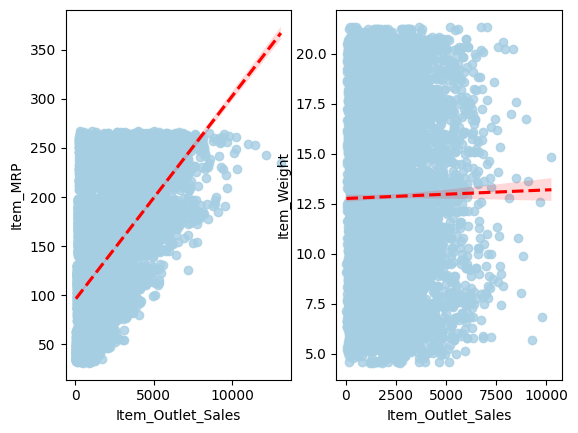

In [9]:
sb.set_palette('Paired')
plt.subplot(1,2,1)
sb.regplot(x='Item_Outlet_Sales',y='Item_MRP',data=df,line_kws={'color': 'red', 'linestyle': '--', 'label': 'Regression Line'})

plt.subplot(1,2,2)
sb.regplot(x='Item_Outlet_Sales',y='Item_Weight',data=df,line_kws={'color':'red','linestyle':'--','label':'regline'})

In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# handling missing values

In [12]:
knn = KNNImputer()

In [13]:
df.Item_Weight = knn.fit_transform(df[['Item_Weight']])

In [14]:
# replacing the outlet size with mode

In [15]:
most_rep_outlet = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [16]:
most_rep_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
df1 = df[(df.Outlet_Type == 'Grocery Store') & (df.Outlet_Size.isna())].fillna('Small')
df2 = df[(df.Outlet_Type == 'Supermarket Type1') & (df.Outlet_Size.isna())].fillna('Small')
df3 = df[(df.Outlet_Type == 'Supermarket Type2') & (df.Outlet_Size.isna())].fillna('Medium')
df4 = df[(df.Outlet_Type == 'Supermarket Type3') & (df.Outlet_Size.isna())].fillna('Medium')

In [18]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
df1.shape

(555, 12)

In [20]:
df2.shape

(1855, 12)

In [21]:
df3.shape

(0, 12)

In [22]:
df4.shape

(0, 12)

In [23]:
df = df.dropna()

In [24]:
df.shape

(6113, 12)

In [25]:
df = pd.concat([df,df1,df2,df3,df4],axis=0,ignore_index=True)

In [26]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
df.shape

(8523, 12)

In [28]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


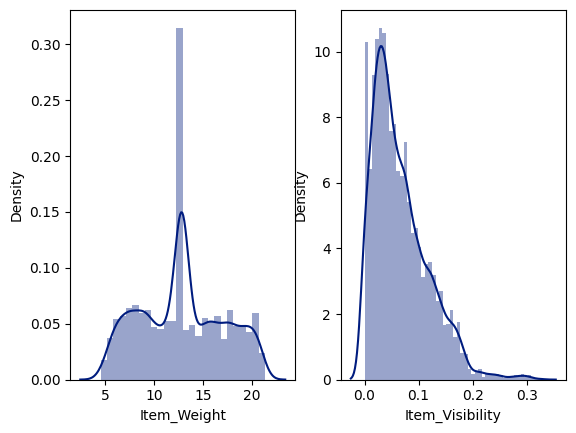

In [29]:
sb.set_palette('dark')
plt.subplot(1,2,1)
# plt.figure(figsize=(4,4))
sb.distplot(df.Item_Weight)



plt.subplot(1,2,2)
sb.distplot(df.Item_Visibility)

plt.show()

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

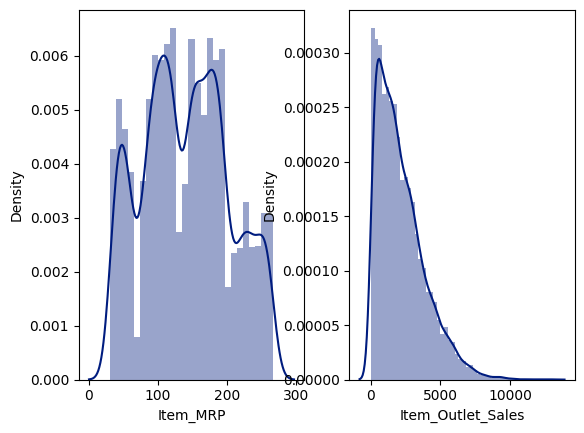

In [30]:
plt.subplot(1,2,1)
sb.distplot(df.Item_MRP)

plt.subplot(1,2,2)
sb.distplot(df.Item_Outlet_Sales)

<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='count'>

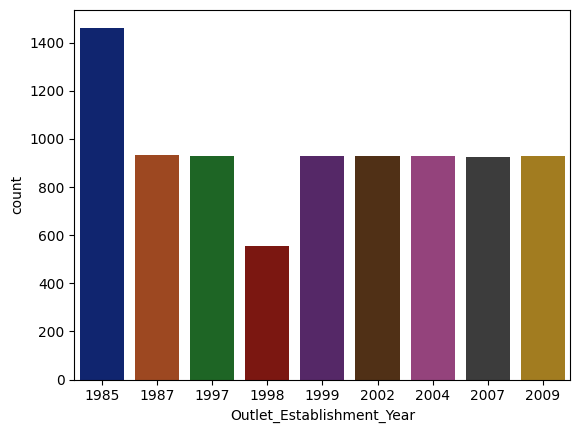

In [31]:
sb.countplot(data=df,x='Outlet_Establishment_Year')

<AxesSubplot: xlabel='Item_Type', ylabel='count'>

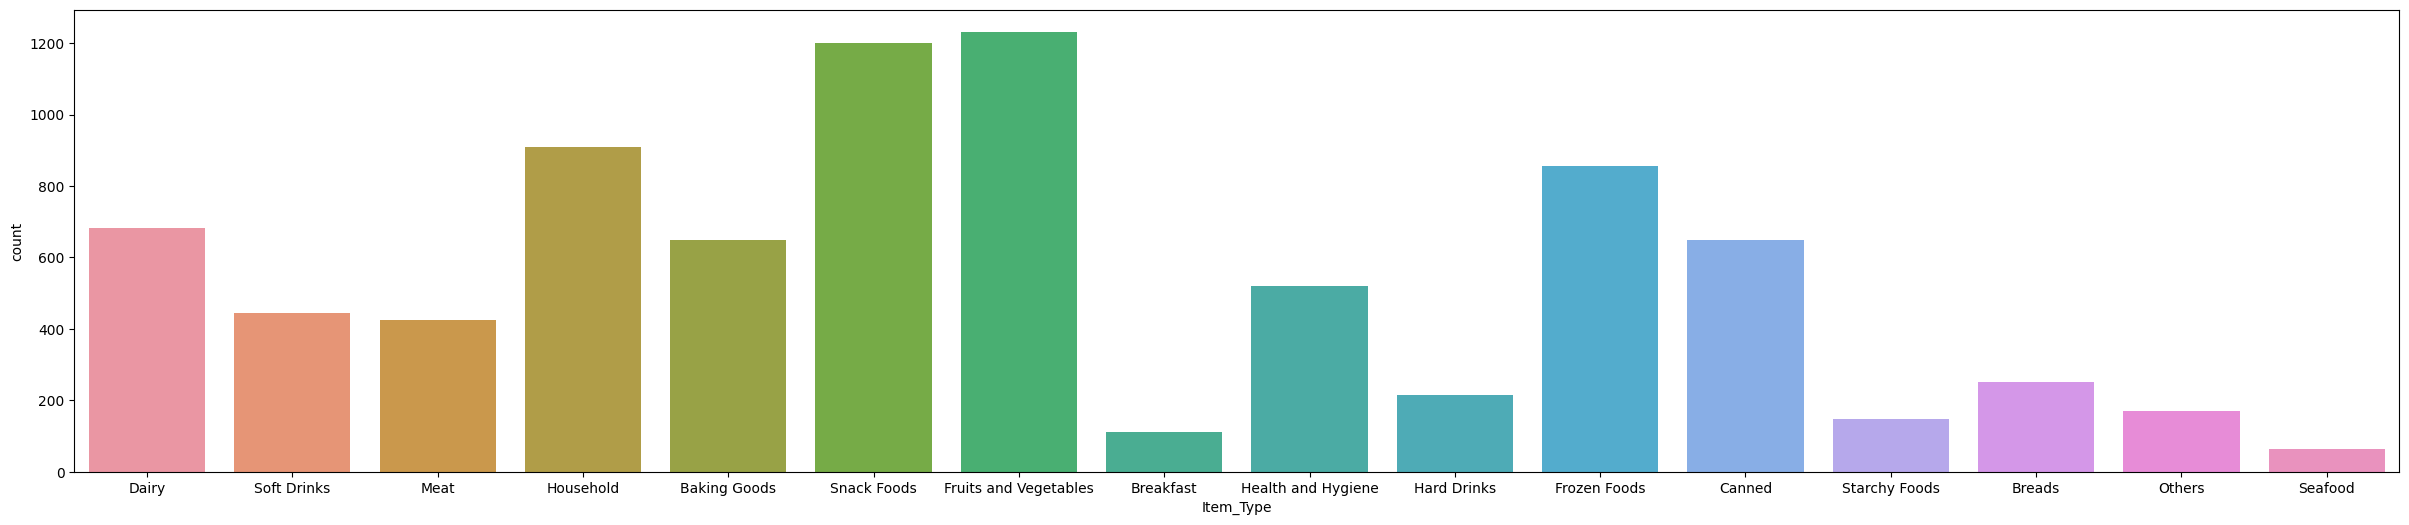

In [32]:
plt.figure(figsize=(30,6))
sb.countplot(data=df,x='Item_Type')

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='count'>

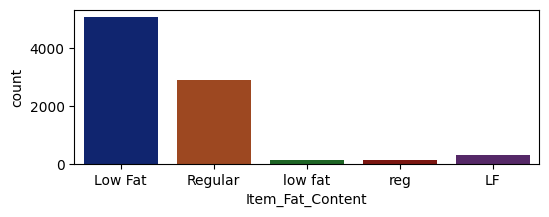

In [33]:
plt.figure(figsize=(6,2))
sb.countplot(data=df,x='Item_Fat_Content')

In [34]:
df.Item_Fat_Content.replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'},inplace=True)

In [35]:
for i in df.select_dtypes(object):
    print(i)
    print(df[i].unique())
    print('________________')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCR42' 'DRF48' 'FDT35']
________________
Item_Fat_Content
['Low Fat' 'Regular']
________________
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Household' 'Baking Goods' 'Snack Foods'
 'Fruits and Vegetables' 'Breakfast' 'Health and Hygiene' 'Hard Drinks'
 'Frozen Foods' 'Canned' 'Starchy Foods' 'Breads' 'Others' 'Seafood']
________________
Outlet_Identifier
['OUT049' 'OUT018' 'OUT013' 'OUT027' 'OUT046' 'OUT035' 'OUT019' 'OUT010'
 'OUT045' 'OUT017']
________________
Outlet_Size
['Medium' 'High' 'Small']
________________
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
________________
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Supermarket Type3'
 'Grocery Store']
________________


<AxesSubplot: xlabel='Outlet_Size', ylabel='count'>

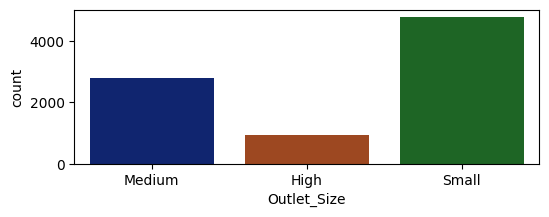

In [36]:

plt.figure(figsize=(6,2))
sb.countplot(x='Outlet_Size',data=df)



<AxesSubplot: xlabel='Outlet_Type', ylabel='count'>

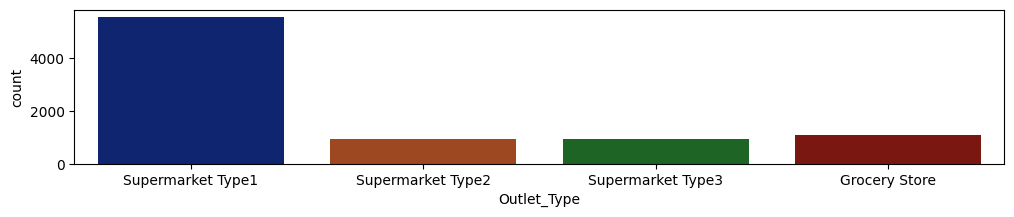

In [37]:
plt.figure(figsize=(12,2))
sb.countplot(x='Outlet_Type',data=df)

In [38]:
df.to_csv('cleaned_data')

In [39]:
data = pd.read_csv('cleaned_data')

In [40]:
data = data.iloc[:,2:]

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


# Splitting into features and target

In [42]:
X = data.drop('Item_Outlet_Sales',axis=1)
y = data['Item_Outlet_Sales']

# Train test split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [44]:
# column transformation

In [57]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6404,15.200000,Low Fat,0.020280,Health and Hygiene,49.1034,OUT010,1998,Small,Tier 3,Grocery Store
5820,12.850000,Low Fat,0.033193,Fruits and Vegetables,199.0768,OUT013,1987,High,Tier 3,Supermarket Type1
48,12.857645,Low Fat,0.012090,Fruits and Vegetables,38.2848,OUT027,1985,Medium,Tier 3,Supermarket Type3
4583,18.850000,Regular,0.068230,Dairy,121.0440,OUT018,2009,Medium,Tier 3,Supermarket Type2
3791,8.760000,Low Fat,0.050011,Health and Hygiene,126.7336,OUT013,1987,High,Tier 3,Supermarket Type1


In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 6404 to 2732
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6818 non-null   float64
 1   Item_Fat_Content           6818 non-null   object 
 2   Item_Visibility            6818 non-null   float64
 3   Item_Type                  6818 non-null   object 
 4   Item_MRP                   6818 non-null   float64
 5   Outlet_Identifier          6818 non-null   object 
 6   Outlet_Establishment_Year  6818 non-null   int64  
 7   Outlet_Size                6818 non-null   object 
 8   Outlet_Location_Type       6818 non-null   object 
 9   Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 585.9+ KB


In [45]:
trf1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,2,4,6,7,8])
],remainder='passthrough')

In [58]:
# trf1.fit_transform(X_train,y_train)

array([[0.0, 0.0, 0.0, ..., 'Health and Hygiene', 'OUT010',
        'Grocery Store'],
       [0.0, 0.0, 0.0, ..., 'Fruits and Vegetables', 'OUT013',
        'Supermarket Type1'],
       [0.0, 0.0, 0.0, ..., 'Fruits and Vegetables', 'OUT027',
        'Supermarket Type3'],
       ...,
       [0.0, 0.0, 0.0, ..., 'Snack Foods', 'OUT018', 'Supermarket Type2'],
       [0.0, 0.0, 0.0, ..., 'Fruits and Vegetables', 'OUT013',
        'Supermarket Type1'],
       [0.0, 0.0, 0.0, ..., 'Baking Goods', 'OUT013',
        'Supermarket Type1']], dtype=object)

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 6404 to 2732
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6818 non-null   float64
 1   Item_Fat_Content           6818 non-null   object 
 2   Item_Visibility            6818 non-null   float64
 3   Item_Type                  6818 non-null   object 
 4   Item_MRP                   6818 non-null   float64
 5   Outlet_Identifier          6818 non-null   object 
 6   Outlet_Establishment_Year  6818 non-null   int64  
 7   Outlet_Size                6818 non-null   object 
 8   Outlet_Location_Type       6818 non-null   object 
 9   Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 585.9+ KB


# Building the pipeline of different models

In [49]:
lr = LinearRegression()
knn = KNeighborsRegressor()
xgb = XGBRegressor()
rf = RandomForestRegressor()
lasso = Lasso()
ridge = Ridge()
dt = DecisionTreeRegressor()

pipe_lr = Pipeline([
    ('trf1',trf1),
    ('std',StandardScaler()),
    ('lr',lr)
])

pipe_knn = Pipeline([
    ('trf1',trf1),
    ('std',StandardScaler()),
    ('knn',knn)
    
])

pipe_xgb = Pipeline([
    ('trf1',trf1),
    ('xgb',xgb)
    
])

pipe_rf = Pipeline([
    ('trf1',trf1),
    ('rf',rf)
    
])

pipe_lasso = Pipeline([
    ('trf1',trf1),
    ('lasso',lasso)
    
])

pipe_ridge = Pipeline([
    ('trf1',trf1),
    ('ridge',ridge)
    
])

pipe_dt = Pipeline([
    ('trf1',trf1),
    ('dt',dt)
    
])

In [50]:
pipes = [pipe_dt,pipe_knn,pipe_lasso,pipe_lr,pipe_rf,pipe_ridge,pipe_xgb]
models_dict = {0:'Decision_tree',1:'KNN',2:'lasso',3:'Linear_reg',4:'Random_forest',5:'Ridge',6:'Xgboost'}

In [51]:
def best_score(xtr,xt,ytr,yt):
    dict={}
    for i,model in enumerate(pipes):
        model.fit(xtr,ytr)
        y_pred = model.predict(xt)
        scr = r2_score(yt,y_pred)
        dict[models_dict[i]] = f'{round(scr*100,2)}%'
        
    scr_df = pd.DataFrame(dict,index=['R2_score'])
    
    return scr_df
        

In [52]:
best_score(X_train,y_train,X_test,y_test)

ValueError: could not convert string to float: 'Low Fat'